In [333]:
import numpy as np
import pandas as pd
import seaborn as sb
from tqdm import tqdm
import matplotlib.pyplot as plt

# EDA

Setiap file csv, itu adalah data rekaman real-time Tegangan, Arus, Temperatur, Beban Arus, & Beban Tegangan baterai saat pengosongan (discharge)

In [334]:
testing_record = pd.read_csv('data/00001.csv')
testing_record.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625


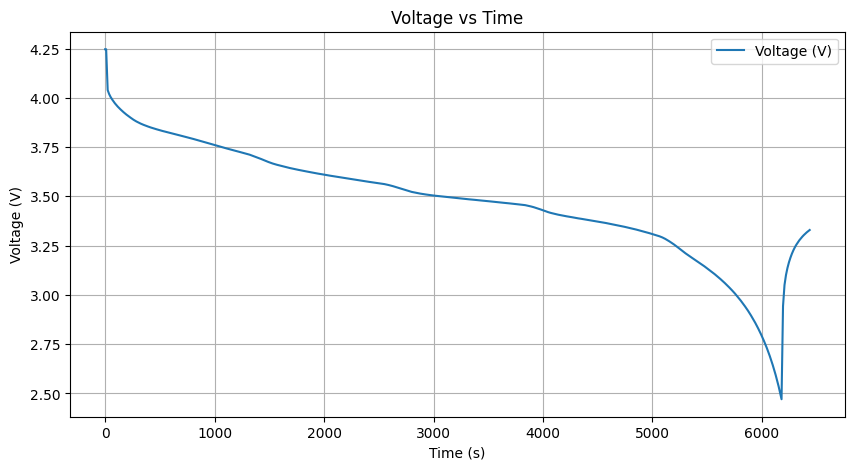

In [335]:
plt.figure(figsize=(10, 5))
plt.plot(testing_record['Time'],testing_record['Voltage_measured'], label='Voltage (V)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time')
plt.grid()
plt.show()

Tegangan baterai semakin menurun seiring waktu

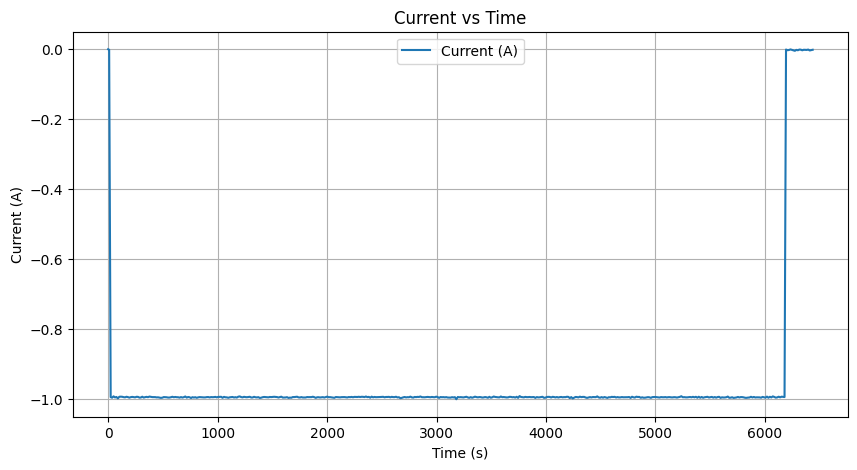

In [336]:
plt.figure(figsize=(10, 5))
plt.plot(testing_record['Time'], testing_record['Current_measured'], label='Current (A)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current vs Time')
plt.grid()
plt.show()

Arus cenderung konstan seiring waktu

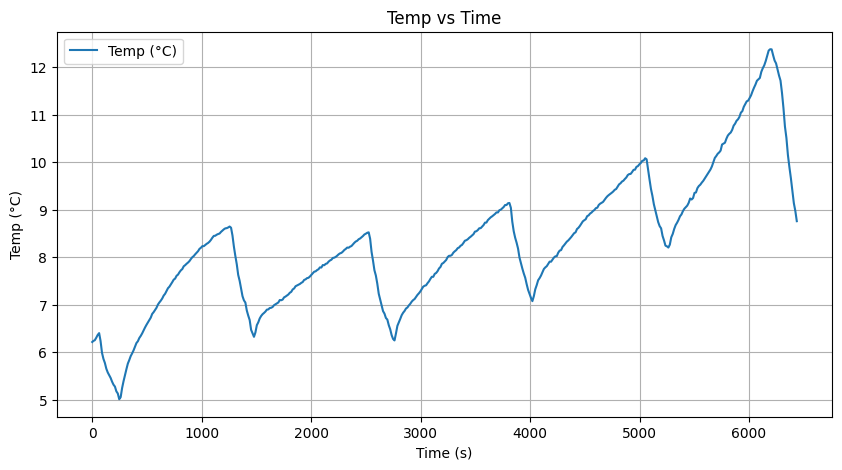

In [337]:
plt.figure(figsize=(10, 5))
plt.plot(testing_record['Time'], testing_record['Temperature_measured'], label='Temp (°C)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Temp (°C)')
plt.title('Temp vs Time')
plt.grid()
plt.show()

Seiring waktu, temperatur baterai semakin panas

metadata.csv berisi detail / informasi deskriptif dari setiap data uji coba baterai yang ada pada folder 'data'

In [338]:
metadata = pd.read_csv('metadata.csv')

metadata.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


Melalui metadata kita bisa mengetahui percobaan mana yang tipe nya discharge (pengosongan baterai) melalui kolom battery_id

In [339]:
metadata[metadata['type'] == 'discharge']['battery_id']

0       B0047
4       B0047
6       B0047
8       B0047
10      B0047
        ...  
7553    B0055
7555    B0055
7557    B0055
7561    B0055
7563    B0055
Name: battery_id, Length: 2794, dtype: object

# Data Preprocessing

Hanya menggunakan data percobaan discharge

In [340]:
excluded_batteries = ['B0049', 'B0050', 'B0051', 'B0052']


discharged_metadata = metadata[ (metadata['type'] == 'discharge')]
# discharged_metadata = metadata[ (metadata['type'] == 'discharge') & (~metadata['battery_id'].isin(excluded_batteries))]

In [341]:
discharged_metadata['battery_id'].unique()

array(['B0047', 'B0045', 'B0048', 'B0046', 'B0043', 'B0032', 'B0039',
       'B0040', 'B0029', 'B0028', 'B0042', 'B0034', 'B0038', 'B0033',
       'B0030', 'B0041', 'B0027', 'B0044', 'B0036', 'B0025', 'B0026',
       'B0031', 'B0049', 'B0050', 'B0052', 'B0051', 'B0006', 'B0005',
       'B0007', 'B0018', 'B0053', 'B0054', 'B0056', 'B0055'], dtype=object)

Tiap battery_id beda kasih cycle number berurut

In [342]:
discharged_metadata.loc[:, 'cycle_number'] = discharged_metadata.groupby('battery_id').cumcount() + 1

C:\Users\Allen\AppData\Local\Temp\ipykernel_13112\1309199493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharged_metadata.loc[:, 'cycle_number'] = discharged_metadata.groupby('battery_id').cumcount() + 1


In [343]:
discharged_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2794 entries, 0 to 7563
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 2794 non-null   object
 1   start_time           2794 non-null   object
 2   ambient_temperature  2794 non-null   int64 
 3   battery_id           2794 non-null   object
 4   test_id              2794 non-null   int64 
 5   uid                  2794 non-null   int64 
 6   filename             2794 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   0 non-null      object
 9   Rct                  0 non-null      object
 10  cycle_number         2794 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 261.9+ KB


In [344]:
# ambil semua capacities dari discharged_metadata dan ubah ke bentuk numeric
initial_capacities = pd.to_numeric(discharged_metadata['Capacity'], errors='coerce')
initial_capacities.max()

2.6401491157387014

In [345]:
nominal_capacity = initial_capacities.mean()

nominal_capacity = 2.0

print(nominal_capacity)

2.0


In [346]:
# A battery is considered unfit for use when its SoH reaches 80%
degrade_capacity_threshold = nominal_capacity * 80/100 
print(degrade_capacity_threshold)

1.6


- Pada step selanjutnya akan dilakukan trimming pada data rekaman yang Voltagenya dibawah 2.7 V karena dibwh 2.7 V berarti baterai ud mw habis. Kita hanya analisis data rekaman baterai sebelum dia habis. Ini dilakukan untuk semua file csv yang tipe experimennya discharge.

- Setelah mendapatkan data rekaman diatas 2.7 V, kita menghitung Capacity baterai menggunakan rumus.

- Melalui Capacity kita bisa menghitung SoC , melalui SoC kita bisa menghitung SoH.

- Masing-masing perhitungan dibuatkan kolom terpisah dalam current dataframe yang diiterasi.



In [347]:
processed_dfs = []

In [348]:
for _, row in tqdm(discharged_metadata.iterrows(), total=len(discharged_metadata)):
    
    file = f"data/{row.filename}"
    df = pd.read_csv(file)

    # cari idx saat voltage pertama kali dibwh 2.7 V, karena dibwh 2.7 V berarti baterai ud mw habis
    cutoff_idx = df[df['Voltage_measured'] < 2.7].index.min()
    # ambil data saat >= 2.7 V saja 
    cutoff_df = df if pd.isna(cutoff_idx) else df.iloc[:cutoff_idx].copy()
    # hitung time diff dalam jam
    cutoff_df['Time_diff_hr'] = cutoff_df['Time'].diff().fillna(0) / 3600
    # hitung Delta Q -> Current Measured x Timediff hr
    cutoff_df['Delta_q'] = cutoff_df['Current_measured'] * cutoff_df['Time_diff_hr']
    #hitung capacity total dari current df (Ah)
    total_capacity = abs(cutoff_df['Delta_q'].sum())
    

    # I understand it now
    #  asumsi 2.0 capacity awal or no? soalnya saat dihitung rata-ratanya capacity awalnya ternyata itu 1.3..
    # Kita ambil data dengan kapasitas di atas threshold supaya hanya menganalisis siklus baterai yang masih sehat atau layak.
    # Kalau kapasitas sudah di bawah threshold, berarti baterai sudah terlalu rusak/degradasi berat, dan data itu kurang representatif untuk analisis kesehatan normal baterai.
    if total_capacity > degrade_capacity_threshold:

        cutoff_df['battery_id'] = row.battery_id
        cutoff_df['cycle_number'] = row.cycle_number
        
        cutoff_df['cumulative_q'] = cutoff_df['Delta_q'].cumsum()
        cutoff_df['SoC'] = 100 * (1 + (cutoff_df['cumulative_q'] / total_capacity))

        if cutoff_df['SoC'].min() < 0 or cutoff_df['SoC'].max() > 100:
            continue
        else :
            cutoff_df['SoH'] = (total_capacity / nominal_capacity) * 100
            # cutoff_df['SoH'] = min((total_capacity / nominal_capacity) * 100, 100.00)
            huh = cutoff_df.copy()

          
            # print(len(cutoff_df))
            num_bins = 20
            #downsampling membagi data jadi num_bins group, tiap group rata-rata isinya len(cutoff_df) / num_bins
            #downsampling buat efesiensi komputasi 
            bins = np.array_split(cutoff_df, num_bins)
            # print(len())
            agg_rows = []
            for b in bins:
                
                if b.empty:
                    continue 

                avg_voltage = b['Voltage_measured'].mean()
                avg_current = b['Current_measured'].mean()
                avg_temp = b['Temperature_measured'].mean()
                avg_soc = b['SoC'].mean()                


                agg_rows.append({
                    'Voltage_measured': avg_voltage,
                    'Current_measured': avg_current,
                    'Temperature_measured': avg_temp,
                    'SoC': avg_soc,
                    'cycle_number': b['cycle_number'].iloc[0],
                    'battery_id': b['battery_id'].iloc[0],
                    'SoH': b['SoH'].iloc[0]
                })

                
                downsampled_df = pd.DataFrame(agg_rows)

                print(downsampled_df)





                # print(bin)
                # break
                    
            # display(bins)
            break
       


  4%|▍         | 125/2794 [00:00<00:16, 162.36it/s]c:\Users\Allen\Documents\Python Env\environments\derp_learning\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
  5%|▌         | 144/2794 [00:00<00:16, 161.59it/s]

   Voltage_measured  Current_measured  Temperature_measured        SoC  \
0          3.933872          -0.91024              5.709549  97.782376   

   cycle_number battery_id        SoH  
0             1      B0048  82.812306  
   Voltage_measured  Current_measured  Temperature_measured        SoC  \
0          3.933872         -0.910240              5.709549  97.782376   
1          3.809721         -0.996627              6.401722  92.753496   

   cycle_number battery_id        SoH  
0             1      B0048  82.812306  
1             1      B0048  82.812306  
   Voltage_measured  Current_measured  Temperature_measured        SoC  \
0          3.933872         -0.910240              5.709549  97.782376   
1          3.809721         -0.996627              6.401722  92.753496   
2          3.764703         -0.996853              7.550120  87.718658   

   cycle_number battery_id        SoH  
0             1      B0048  82.812306  
1             1      B0048  82.812306  
2          

In [349]:
huh.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time,Time_diff_hr,Delta_q,battery_id,cycle_number,cumulative_q,SoC,SoH
0,4.223691,0.000786,6.524867,0.0002,0.000,0.000,0.000000,0.000000e+00,B0048,1,0.000000e+00,100.000000,82.812306
1,4.223669,-0.000108,6.535332,0.0002,4.239,9.360,0.002600,-2.816947e-07,B0048,1,-2.816947e-07,99.999983,82.812306
2,4.005552,-1.000518,6.566910,0.9990,3.466,23.281,0.003867,-3.868949e-03,B0048,1,-3.869230e-03,99.766386,82.812306
3,3.985616,-0.993255,6.609717,0.9990,3.447,36.406,0.003646,-3.621242e-03,B0048,1,-7.490472e-03,99.547744,82.812306
4,3.970828,-0.997432,6.665530,0.9990,3.435,49.625,0.003672,-3.662516e-03,B0048,1,-1.115299e-02,99.326610,82.812306


In [350]:
huh['SoH'][len(huh)-1]

82.81230560292023